In [4]:
import cifar10
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import cv2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
cifar10.data_path = "data/CIFAR-10/"

In [6]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [7]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [9]:
x_train=images_train
y_train=cls_train
x_test=images_test
y_test=cls_test

In [10]:
#Shape of Training and Testing Data
print(f"Shape of x_train:{x_train.shape}, Shape of y_train:{y_train.shape}")
print(f"Shape of x_test:{x_test.shape}, Shape of y_test:{y_test.shape}")

Shape of x_train:(50000, 32, 32, 3), Shape of y_train:(50000,)
Shape of x_test:(10000, 32, 32, 3), Shape of y_test:(10000,)


In [11]:
def names(y):
    ls=[]
    for i in y:
        ls.append(class_names[i])
    return ls

In [12]:
dic={}

for i in names(cls_train):
    dic[i]=dic.get(i,0)+1
dic

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

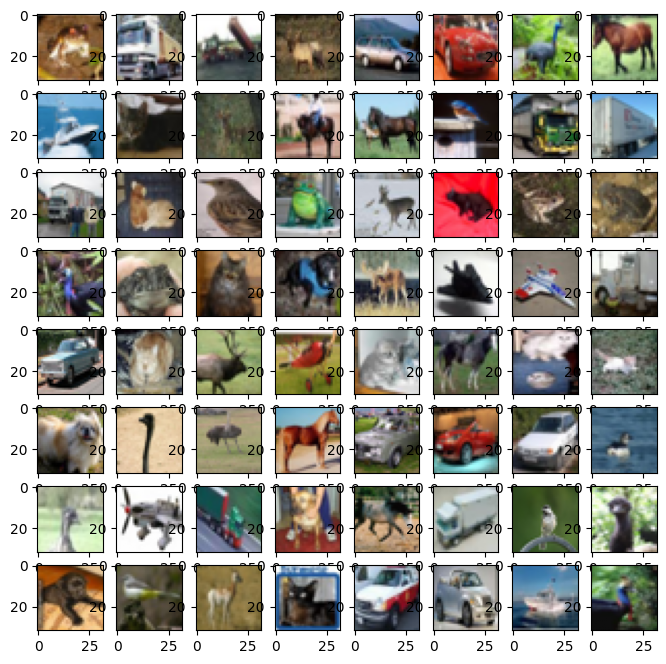

In [13]:
#plotting first 64 images from training data

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_train[i],cmap=plt.cm.bone)
plt.show()

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
# compile model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ck = tf.keras.callbacks.ModelCheckpoint('best_model.hdf5' , save_best_only=True,monitor='val_loss',mode='min')
#es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)


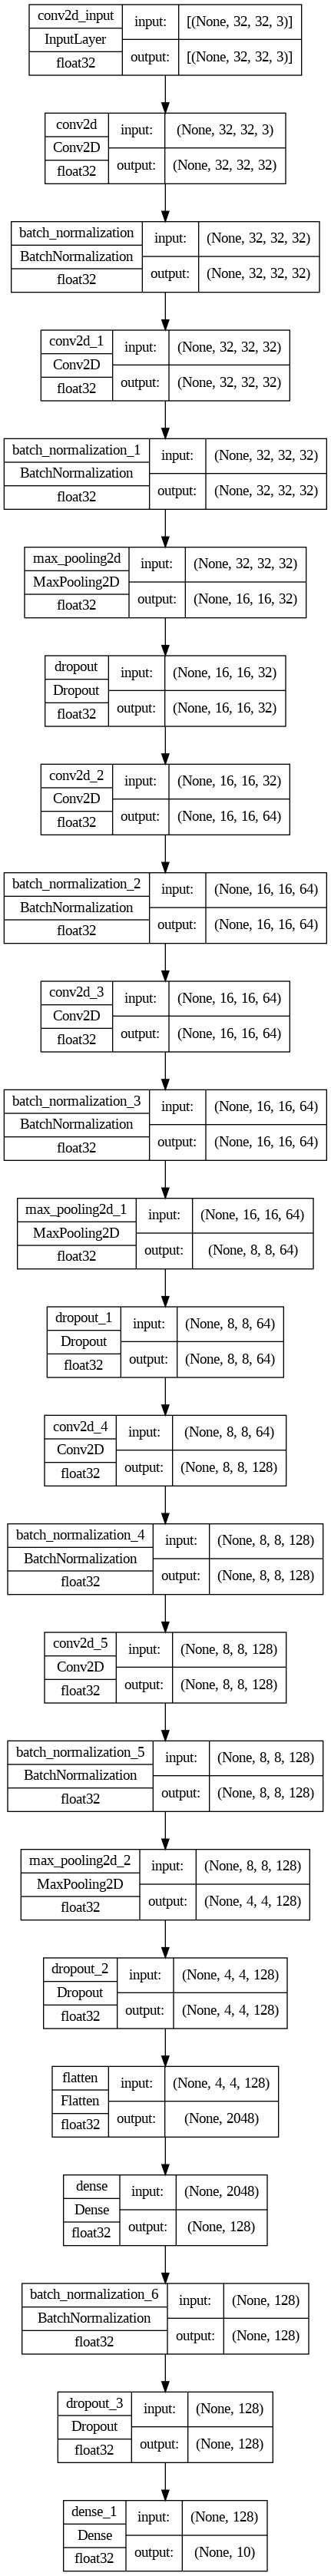

In [16]:
import graphviz
import pydot
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[ck])

Epoch 1/100
782/782 [==============================] - 25s 15ms/step - loss: 1.6128 - accuracy: 0.4467 - val_loss: 1.2196 - val_accuracy: 0.5712
Epoch 2/100
782/782 [==============================] - 10s 13ms/step - loss: 1.0859 - accuracy: 0.6163 - val_loss: 0.9016 - val_accuracy: 0.6870
Epoch 3/100
782/782 [==============================] - 10s 13ms/step - loss: 0.9133 - accuracy: 0.6806 - val_loss: 0.7965 - val_accuracy: 0.7224
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 0.8125 - accuracy: 0.7194 - val_loss: 0.7353 - val_accuracy: 0.7463
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - loss: 0.7367 - accuracy: 0.7432 - val_loss: 0.6934 - val_accuracy: 0.7669
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6772 - accuracy: 0.7645 - val_loss: 0.6838 - val_accuracy: 0.7645
Epoch 7/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6350 - accuracy: 0.7795 - val_loss: 0.6024 - val_ac

In [18]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

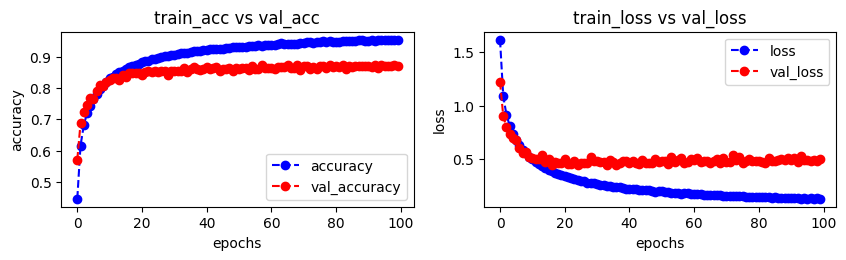

In [19]:
plot_accuracy_loss(history)

In [20]:
model = tf.keras.models.load_model('./best_model.hdf5')

In [21]:
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.4430 - accuracy: 0.8665


In [22]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [23]:
pred_label = np.argmax(prediction, axis = 1) # We take the highest probability

In [24]:
y_pred=names(pred_label)
y_pred

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'airplane',
 'deer',
 'truck',
 'deer',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'cat',
 'deer',
 'automobile',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'frog',
 'truck',
 'ship',
 'horse',
 'cat',
 'ship',
 'ship',
 'horse',
 'horse',
 'horse',
 'frog',
 'horse',
 'dog',
 'frog',
 'cat',
 'frog',
 'bird',
 'automobile',
 'bird',
 'cat',
 'horse',
 'bird',
 'dog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'dog',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'horse',
 'bird',
 'horse',
 'ship',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'f

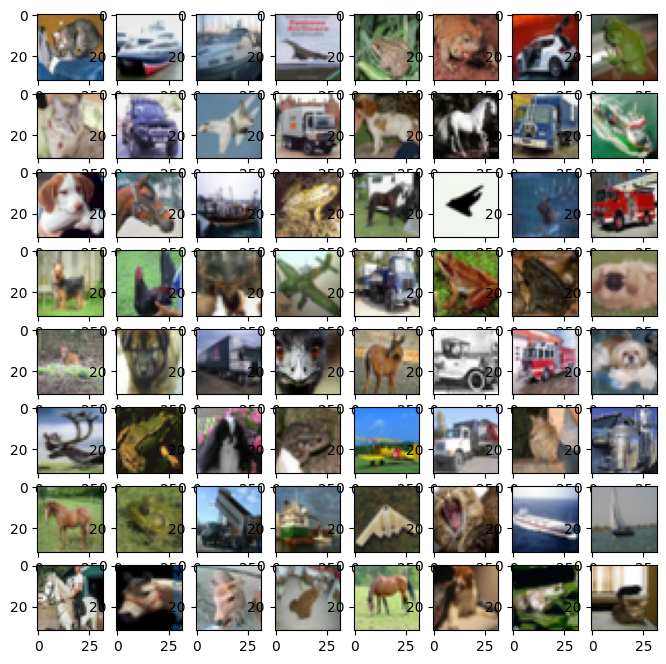

In [25]:
#plotting testing data
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_test[i],cmap=plt.cm.bone)
plt.show()

In [26]:
ser=pd.Series(y_pred)
ser.to_csv('Cifar_10.csv',index=False,header=None)